# Simple Detection Evaluation 

### Leval 1. Binary Evaluation - Species Present vs Not-Present in image
**Evaluating the performance of object detector on classifying task, i.e - performance on finding the species in images**

1. Overall Level
2. Species level

### Level 2. Species Count 
1. Overall level
2. Speceis level
3. Count level

### Level 3. Incorporate IoU
[Look at this when writing](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)

## Level 1:
1. Filter out the images that were not user for model training
2. Make predictions on these images
    - wait, we can run the predictions on all the image and then do the step 1
3. Run the queries - predictorExtractor_main.py and prediction_groundtruth_consolidation_main.py
4. Evaluate predictions

In [2]:
# importing the necessary librabies
import csv, glob
import pandas as pd
import numpy as np
import sklearn.metrics as metric
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [21]:
# Working with the older dataset for building this
filepath = "/home/ubuntu/data/tensorflow/my_workspace/training_demo/Predictions/round1/pred_groundtruth_consolidate_snapshot_serengeti_s01_s06_0_199999-00000-of-00100.csv"
df_pred_gt_consolidated = pd.read_csv(filepath)
df_pred_gt_consolidated = df_pred_gt_consolidated.fillna(0)
df_pred_gt_consolidated.tail()

,filename,species,labels,groundtruth_counts,prediction_counts
3638,S6/V10/V10_R1/S6_V10_R1_IMAG0574,impala,10,0,1
3639,S6/V10/V10_R1/S6_V10_R1_IMAG1213,elephant,11,0,1
3640,S6/V10/V10_R1/S6_V10_R1_IMAG1213,buffalo,14,0,1
3641,S6/V10/V10_R1/S6_V10_R1_IMAG1373,hartebeest,15,0,1
3642,S6/V10/V10_R1/S6_V10_R1_IMAG1373,lionFemale,20,0,1


In [25]:
# Consolidate all the prediction_groundtruth shards
filepath_list = glob.glob("/home/ubuntu/data/tensorflow/my_workspace/training_demo/Predictions/round1/pred_groundtruth_consolidate_snapshot_serengeti_s01_s06_0_199999-00000-of-00100.csv")
def combine_pred_groundtruth_consolidated_files(filepath_list):
    """This function combines all the small shards pred_groundtruth_consolidate_snapshot_serengeti_s01_s06
    into a big file.
    Parameter: filepath for the pred_groundtruth_consolidate_snapshot_serengeti_s01_s06*
    Return: consolidated datframe
    """
    df_pred_gt_consolidated = pd.DataFrame()
    list_temp = []
    for i, filepath in enumerate(filepath_list):
        df_pred_gt_temp = pd.read_csv(filepath)
        df_pred_gt_temp = df_pred_gt_temp.fillna(0)
        list_temp.append(df_pred_gt_temp.shape[0]) # for use to check the correct append. len(list_temp)== 400
        df_pred_gt_consolidated = df_pred_gt_consolidated.append(df_pred_gt_temp)
    return df_pred_gt_consolidated

In [26]:
df_pred_gt_consolidated = combine_pred_groundtruth_consolidated_files(filepath_list)
df_pred_gt_consolidated.tail()

,filename,species,labels,groundtruth_counts,prediction_counts
3638,S6/V10/V10_R1/S6_V10_R1_IMAG0574,impala,10,0,1
3639,S6/V10/V10_R1/S6_V10_R1_IMAG1213,elephant,11,0,1
3640,S6/V10/V10_R1/S6_V10_R1_IMAG1213,buffalo,14,0,1
3641,S6/V10/V10_R1/S6_V10_R1_IMAG1373,hartebeest,15,0,1
3642,S6/V10/V10_R1/S6_V10_R1_IMAG1373,lionFemale,20,0,1


### Level 1:

In [27]:
y_true = [val != 0 for val in df_pred_gt_consolidated["groundtruth_counts"]]
y_pred = [val != 0 for val in df_pred_gt_consolidated["prediction_counts"]]
print(sum(y_true), sum(y_pred))

2107 3354


In [28]:
tn, fp, fn, tp = metric.confusion_matrix(y_true, y_pred).ravel()
print(metric.confusion_matrix(y_true, y_pred))
print(tn, fp, fn, tp)

[[   0 1536]
 [ 289 1818]]
0 1536 289 1818


In [29]:
# For a classification task the recall is:
recall = round(tp/(tp + fn), 3)
precision = round(tp/(tp + fp), 3)
accuracy = round((tp+tn)/(tp + fn + fp + tn), 3)
f1_score = round(2*recall*precision/(recall + precision), 3)

print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1-Score: {0}".format(f1_score))
print("Accuracy: {0}".format(accuracy))
      

Recall: 0.863
Precision: 0.542
F1-Score: 0.666
Accuracy: 0.499


Confusion matrix, without normalization
[[   0 1536]
 [ 289 1818]]


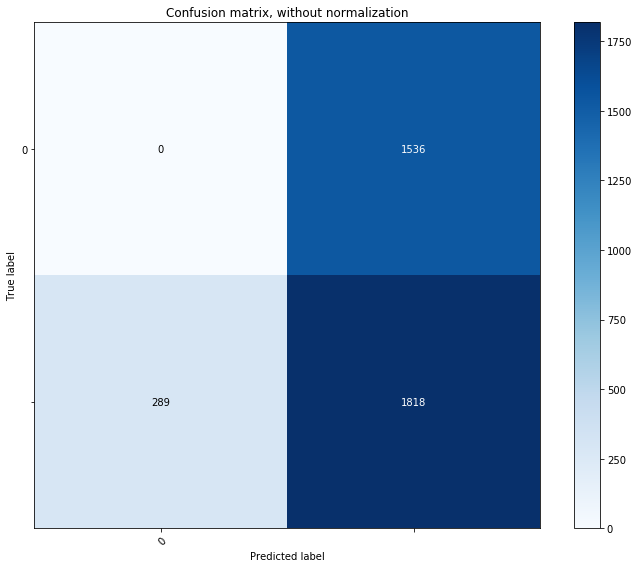

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metric.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=np.array(['1', '0']),
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_true, y_pred, classes=np.array(['false', 'true']), normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

## Level 2.

In [31]:
for species in set(df_pred_gt_consolidated['species']):
    error = False
    print(species)
    df_temp = df_pred_gt_consolidated[df_pred_gt_consolidated['species']==species]
    y_true = [val != 0 for val in df_temp["groundtruth_counts"]]
    y_pred = [val != 0 for val in df_temp["prediction_counts"]]
    try:
        tn, fp, fn, tp = metric.confusion_matrix(y_true, y_pred).ravel()
    except Exception:
#         y_true = [2] # to know why this exception run this code
#         y_pred = [2]
#         int(confusion_matrix(y_true, y_pred))
        tn, fp, fn, tp = 0, 0, 0, int(metric.confusion_matrix(y_true, y_pred))
        pass

    recall = round(tp/(tp + fn), 3)
    precision = round(tp/(tp + fp), 3)
    accuracy = round((tp+tn)/(tp + fn + fp + tn), 3)
    f1_score = round(2*recall*precision/(recall + precision), 3)
    print(metric.confusion_matrix(y_true, y_pred))
    print("Recall: {0}".format(recall))
    print("Precision: {0}".format(precision))
    print("F1-Score: {0}".format(f1_score))
    print("Accuracy: {0}".format(accuracy))
    print("\n")

lionMale
[[ 0 38]
 [ 0  0]]
Recall: nan
Precision: 0.0
F1-Score: nan
Accuracy: 0.0


batEaredFox
[[0 2]
 [3 2]]
Recall: 0.4
Precision: 0.5
F1-Score: 0.444
Accuracy: 0.286


buffalo
[[  0 199]
 [ 19  74]]
Recall: 0.796
Precision: 0.271
F1-Score: 0.404
Accuracy: 0.253


serval
[[0 2]
 [2 0]]
Recall: 0.0
Precision: 0.0
F1-Score: nan
Accuracy: 0.0


gazelleThomsons
[[  0  48]
 [ 35 279]]
Recall: 0.889
Precision: 0.853
F1-Score: 0.871
Accuracy: 0.771


zebra
[[  0  44]
 [ 36 374]]
Recall: 0.912
Precision: 0.895
F1-Score: 0.903
Accuracy: 0.824


koriBustard
[[0 5]
 [2 4]]
Recall: 0.667
Precision: 0.444
F1-Score: 0.533
Accuracy: 0.364


topi
[[ 0 91]
 [ 5  8]]
Recall: 0.615
Precision: 0.081
F1-Score: 0.143
Accuracy: 0.077


dikDik
[[ 0 16]
 [ 3  5]]
Recall: 0.625
Precision: 0.238
F1-Score: 0.345
Accuracy: 0.208


impala
[[ 0 54]
 [15 50]]
Recall: 0.769
Precision: 0.481
F1-Score: 0.592
Accuracy: 0.42


hyenaSpotted
[[ 0  8]
 [10 22]]
Recall: 0.688
Precision: 0.733
F1-Score: 0.71
Accuracy: 0.55

/home/ubuntu/test_env/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/home/ubuntu/test_env/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/test_env/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
